## This takes full advantage of Neural Prophet's ability to use a neural network
## along with many other tools in the Prophet set. It does require some tweaking
## for each particular model to be run.

In [20]:
# note that neuralprophet has to be cloned in its entirety for it to work
import pandas as pd
from neuralprophet import NeuralProphet

In [21]:
df = pd.read_csv('/home/matt/DataspellProjects/mercury-ds/attribution/NeuralProphet/kind_neuralprophet.csv')

#### This is the most important cell in the notebook. Here you define how you want your
#### data to used in the neural network; there are a variety of options available in the
#### documentation. I think these are suitable in most cases, but some tweaks might be
#### valuable. You can watch the progress below as the model minimizes the RMSE among
#### metrics

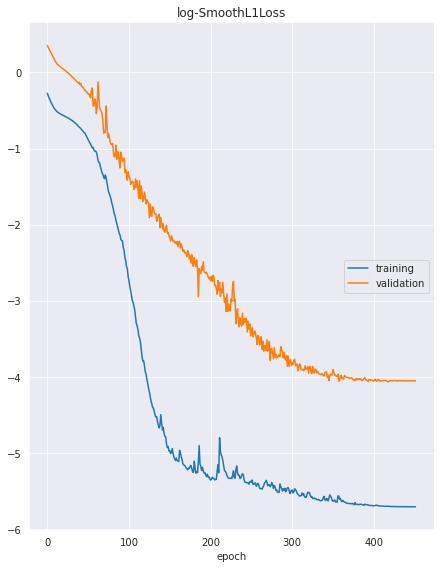

log-SmoothL1Loss
	training         	 (min:   -5.709, max:   -0.275, cur:   -5.709)
	validation       	 (min:   -4.066, max:    0.355, cur:   -4.054)


In [22]:
m = NeuralProphet(
        growth='linear',
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        n_forecasts=14,
        n_lags=3,
        num_hidden_layers=20,
        d_hidden=30,
        learning_rate=0.002,
        loss_func = "Huber",
        optimizer = "AdamW",
)
df_train, df_test = m.split_df(df, freq='W')
metrics = m.fit(df_train, freq='W', validation_df=df_test, progress='plot')

In [23]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
451,0.003316,70466.215135,102817.196595,0.0,0.017358,191782.984375,237041.1875


#### Haven't found a workaround for the problem yet, but in the previous cell you have to
#### the number of prediction periods, otherwise the 'make_future_dataframe' function
#### will only generate one. Further, the output in forecast needs arranged a bit before
#### it's in the usal prediction form.

In [24]:
future = m.make_future_dataframe(df, periods=14, n_historic_predictions=12)
forecast = m.predict(future)
# forecast.to_csv('tyson_forecast.csv',index=False)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.49% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 96.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 96.552% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
